<a href="https://colab.research.google.com/github/Mani0322/Deep-learning/blob/main/cheta_hyena_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import os
os.environ["KAGGLE_CONFIG_DIR"]="/content/gdrive/MyDrive"

In [3]:
!kaggle datasets download -d singhdatascientist/for-image-classification-of-cheetah-vs-hyena

 94% 145M/154M [00:06<00:00, 24.4MB/s]
100% 154M/154M [00:06<00:00, 26.1MB/s]


In [4]:
!unzip \*.zip

Archive:  for-image-classification-of-cheetah-vs-hyena.zip
  inflating: train/cheetah/cheetah_000_resized.jpg  
  inflating: train/cheetah/cheetah_001_resized.jpg  
  inflating: train/cheetah/cheetah_002_resized.jpg  
  inflating: train/cheetah/cheetah_003_resized.jpg  
  inflating: train/cheetah/cheetah_004_resized.jpg  
  inflating: train/cheetah/cheetah_005_resized.jpg  
  inflating: train/cheetah/cheetah_006_resized.jpg  
  inflating: train/cheetah/cheetah_007_resized.jpg  
  inflating: train/cheetah/cheetah_008_resized.jpg  
  inflating: train/cheetah/cheetah_009_resized.jpg  
  inflating: train/cheetah/cheetah_010_resized.jpg  
  inflating: train/cheetah/cheetah_011_resized.jpg  
  inflating: train/cheetah/cheetah_012_resized.jpg  
  inflating: train/cheetah/cheetah_013_resized.jpg  
  inflating: train/cheetah/cheetah_014_resized.jpg  
  inflating: train/cheetah/cheetah_015_resized.jpg  
  inflating: train/cheetah/cheetah_016_resized.jpg  
  inflating: train/cheetah/cheetah_017_r

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tqdm import tqdm

In [15]:
class_names = ["cheetah","hyena"]
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (227, 227)

In [16]:
def load_data():

    datasets = ['/content/train', '/content/validation']
    output = []
    

    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
      
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
          
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
              
                img_path = os.path.join(os.path.join(dataset, folder), file)
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
              
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [17]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading /content/train


100%|██████████| 900/900 [00:04<00:00, 224.23it/s]


Loading /content/validation


100%|██████████| 100/100 [00:00<00:00, 261.58it/s]


In [18]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [19]:
train_images.shape

(1800, 227, 227, 3)

In [20]:
train_images = train_images/255.0
test_images = test_images/255.0

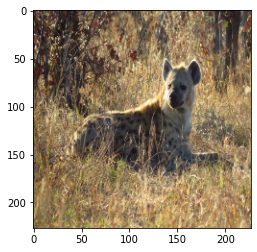

In [21]:
plt.figure()
plt.imshow(train_images[4])
plt.show()

In [22]:
import tensorflow as tf
from tensorflow import keras
from keras import layers


In [23]:
train_images = train_images.reshape(len(train_images),227,227,3)
test_images = test_images.reshape(len(test_images),227,227,3)

In [31]:
train_labels = keras.utils.to_categorical(train_labels,nb_classes)
test_labels = keras.utils.to_categorical(test_labels,nb_classes)

In [32]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [42]:
model = keras.models.Sequential()
# conv1
model.add(layers.Conv2D(96,(11,11),activation="relu",input_shape=(227,227,3),strides=(4,4),padding="valid"))
model.add(layers.MaxPool2D((3,3),strides=(2,2),padding="valid"))
model.add(layers.BatchNormalization())
#conv2
model.add(layers.Conv2D(256,(5,5),activation="relu",padding="valid"))
model.add(layers.MaxPool2D((3,3),strides=(2,2),padding="valid"))
model.add(layers.BatchNormalization())
#conv3
model.add(layers.Conv2D(384,(3,3),activation="relu",padding="valid"))
model.add(layers.BatchNormalization())
#conv4
model.add(layers.Conv2D(384,(3,3),padding="valid",activation="relu"))
model.add(layers.BatchNormalization())
#conv5
model.add(layers.Conv2D(256,(3,3),padding="valid",activation="relu"))
model.add(layers.MaxPool2D((3,3),strides=(2,2),padding="valid"))
model.add(layers.BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dense(4096,activation="relu",input_shape=(227,227,3)))
model.add(layers.Dropout(0.4))
model.add(layers.BatchNormalization())
model.add(layers.Dense(4096,activation="relu"))
model.add(layers.Dropout(0.4))
model.add(layers.BatchNormalization())
model.add(layers.Dense(1000,activation="relu"))
model.add(layers.Dropout(0.4))
model.add(layers.BatchNormalization())
model.add(layers.Dense(2,activation="sigmoid"))


In [43]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 27, 27, 96)       0         
 g2D)                                                            
                                                                 
 batch_normalization_8 (Batc  (None, 27, 27, 96)       384       
 hNormalization)                                                 
                                                                 
 conv2d_18 (Conv2D)          (None, 23, 23, 256)       614656    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 11, 11, 256)      0         
 g2D)                                                            
                                                      

In [44]:
model.compile(loss="categorical_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

In [46]:
r = model.fit(train_images,train_labels,epochs=20,validation_data=(test_images,test_labels),batch_size=64)

Epoch 1/20
29/29 [==============================] - 4s 137ms/step - loss: 0.3189 - accuracy: 0.8594 - val_loss: 2.0038 - val_accuracy: 0.5100
Epoch 2/20
29/29 [==============================] - 4s 132ms/step - loss: 0.3210 - accuracy: 0.8722 - val_loss: 4.0544 - val_accuracy: 0.6150
Epoch 3/20
29/29 [==============================] - 4s 132ms/step - loss: 0.2929 - accuracy: 0.8844 - val_loss: 1.6171 - val_accuracy: 0.7350
Epoch 4/20
29/29 [==============================] - 4s 132ms/step - loss: 0.2386 - accuracy: 0.8967 - val_loss: 6.9396 - val_accuracy: 0.5200
Epoch 5/20
29/29 [==============================] - 4s 133ms/step - loss: 0.2995 - accuracy: 0.8783 - val_loss: 6.2020 - val_accuracy: 0.5000
Epoch 6/20
29/29 [==============================] - 4s 133ms/step - loss: 0.2325 - accuracy: 0.9100 - val_loss: 0.8077 - val_accuracy: 0.7800
Epoch 7/20
29/29 [==============================] - 4s 133ms/step - loss: 0.1910 - accuracy: 0.9244 - val_loss: 1.6808 - val_accuracy: 0.7350
Epoch 

In [47]:
model.evaluate(test_images,test_labels)

7/7 [==============================] - 0s 35ms/step - loss: 0.5301 - accuracy: 0.8200


[0.5301240086555481, 0.8199999928474426]

In [52]:
new_img = test_images[0:3]
prob = model.predict(new_img)
prob.round(2)

array([[0.07, 0.98],
       [0.44, 0.57],
       [0.08, 0.97]], dtype=float32)

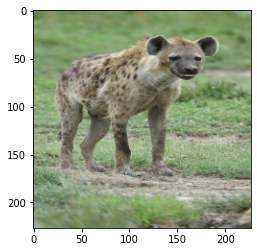

In [54]:
plt.figure()
plt.imshow(test_images[2])
plt.show()